# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# join two dataframes in python: 
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [6]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity'],
      dtype='object')

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:44<00:00, 2456.33it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

In [19]:
project_data["essay"]=preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 55887.14it/s]


In [21]:
print(project_data['project_title'].values[20000])
project_data['project_title']=preprocessed_project_title
print(project_data['project_title'].values[20000])

We Need To Move It While We Input It!
need move input


# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

In [22]:
sampling=True
undersampling=True
if (not sampling):
    print("Total data ",project_data.shape)
    
else:
    if(sampling and undersampling):
        print("Total data ",project_data.shape)
        project_data_negative=project_data[project_data.project_is_approved==0]
        project_data_positive=project_data[project_data.project_is_approved==1]
        project_data_positive=project_data_positive.sample(n=project_data_negative.shape[0],random_state=42)
        print("Positive points: ",project_data_positive.shape[0])
        print("Negaitive points: ",project_data_negative.shape[0])
        project_data=pd.concat([project_data_positive,project_data_negative])
    else:
        print("Total data ",project_data.shape)
        project_data_negative=project_data[project_data.project_is_approved==0]
        project_data_positive=project_data[project_data.project_is_approved==1]
        project_data_negative=project_data_negative.sample(n=project_data_positive.shape[0],replace=True,random_state=42)
        print("Positive points: ",project_data_positive.shape[0])
        print("Negaitive points: ",project_data_negative.shape[0])
        project_data=pd.concat([project_data_positive,project_data_negative])

data_point_size=5000
project_data=project_data.sample(n=data_point_size,random_state=42,replace=False)
print("positive and negative counts")
print(project_data.project_is_approved.value_counts())
print(project_data.shape)

Total data  (109248, 20)
Positive points:  16542
Negaitive points:  16542
positive and negative counts
1    2530
0    2470
Name: project_is_approved, dtype: int64
(5000, 20)


<h2>2.1 Choose the best data matrix on which you got the best AUC. `I have choosen Bag of words as Model` </h2>

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

<h2>2.2.1 Categorical features </h2>

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_clean_categories = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_clean_categories.fit(project_data['clean_categories'].values)
print(vectorizer_clean_categories.get_feature_names())

#for train data
categories_one_hot = vectorizer_clean_categories.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (5000, 9)


In [24]:
vectorizer_clean_subcategories = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_clean_subcategories.fit(project_data['clean_subcategories'].values)
print(vectorizer_clean_subcategories.get_feature_names())

#for train data
sub_categories_one_hot = vectorizer_clean_subcategories.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)


['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (5000, 30)


In [25]:
project_data.teacher_prefix = project_data.teacher_prefix.replace(np.nan, '', regex=True)
print(project_data.teacher_prefix.value_counts())

Mrs.       2550
Ms.        1841
Mr.         511
Teacher      97
Dr.           1
Name: teacher_prefix, dtype: int64


In [26]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer_teacher_prefix = CountVectorizer(vocabulary=['Mrs.','Ms.','Mr.','Teacher','Dr.'], lowercase=False, binary=True)
vectorizer_teacher_prefix.fit(project_data['teacher_prefix'].values)
print(vectorizer_teacher_prefix.get_feature_names())

teacher_prefix_one_hot = vectorizer_teacher_prefix.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Mrs.', 'Ms.', 'Mr.', 'Teacher', 'Dr.']
Shape of matrix after one hot encodig  (5000, 5)


In [27]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer_project_grade_category = CountVectorizer(vocabulary=list(project_data['project_grade_category'].unique()), lowercase=False, binary=True)
vectorizer_project_grade_category.fit(project_data['project_grade_category'].values)
print(vectorizer_project_grade_category.get_feature_names())

project_grade_category_one_hot = vectorizer_project_grade_category.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)

['Grades 6-8', 'Grades 9-12', 'Grades 3-5', 'Grades PreK-2']
Shape of matrix after one hot encodig  (5000, 4)


In [28]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer_school_state = CountVectorizer(vocabulary=list(project_data['school_state'].unique()), lowercase=False, binary=True)
vectorizer_school_state.fit(project_data['school_state'].values)
print(vectorizer_school_state.get_feature_names())


school_state_one_hot = vectorizer_school_state.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)

['LA', 'OK', 'FL', 'OH', 'IL', 'CA', 'MA', 'NV', 'NC', 'TX', 'NY', 'MN', 'WI', 'MO', 'GA', 'MI', 'WA', 'CT', 'ME', 'PA', 'KY', 'SC', 'HI', 'CO', 'TN', 'IN', 'ID', 'MS', 'WY', 'VA', 'AR', 'RI', 'MD', 'AL', 'AZ', 'UT', 'DC', 'NJ', 'SD', 'IA', 'OR', 'WV', 'KS', 'VT', 'AK', 'NM', 'MT', 'NH', 'NE', 'ND', 'DE']
Shape of matrix after one hot encodig  (5000, 51)


<h2>2.2.2 Numerical features </h2>

In [29]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = project_data['price'].values#price_scalar.transform(project_data_X_train['price'].values.reshape(-1, 1))

Mean : 321.297792, Standard deviation : 362.6559048645489


In [30]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,normalize

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized = project_data['teacher_number_of_previously_posted_projects'].values#price_scalar.transform(project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 9.7972, Standard deviation : 26.12239790218348


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [31]:
vectorizer_essay_bow = CountVectorizer(min_df=5)
vectorizer_essay_bow.fit(project_data.essay.values)

text_bow=vectorizer_essay_bow.fit_transform(project_data.essay.values)
print(text_bow.shape)

(5000, 6276)


In [32]:
# Similarly you can vectorize for title also
vectorizer_project_title_bow = CountVectorizer(min_df=5)
vectorizer_project_title_bow.fit(project_data.project_title.values)

title_text_bow=vectorizer_project_title_bow.fit_transform(project_data.project_title.values)
print(title_text_bow.shape)

(5000, 651)


<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [33]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
BOW = hstack((categories_one_hot, sub_categories_one_hot,school_state_one_hot,teacher_prefix_one_hot,project_data['price'].values.reshape(-1,1),project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),text_bow,title_text_bow))
print(BOW.shape)

(5000, 7024)


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5000)
BOW_5000 = pca.fit_transform(BOW.todense())
print(BOW_5000.shape)

(5000, 5000)


<h2>2.5 Apply Kmeans</h2>

Text(0,0.5,'inertia')

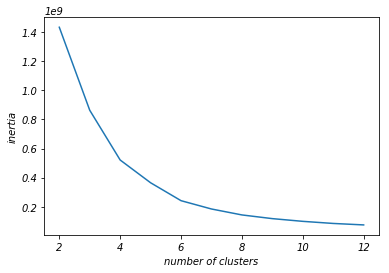

In [36]:
from sklearn.cluster import KMeans
inertia = []
cluster_number=[2,3,4,5,6,7,8,9]
for i in cluster_number:
    #print("For cluster size",i)
    model=KMeans(init='k-means++',n_clusters=i,n_jobs=4)
    model.fit(BOW_5000)
    #print("inertia is:",model.inertia_)
    inertia.append(model.inertia_)
plt.plot(cluster_number,inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')

In [37]:
#train model on optimal parameter
from sklearn.cluster import KMeans
model=KMeans(init='k-means++',n_clusters=4,n_jobs=4)
model.fit(BOW_5000)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
pca = PCA(n_components=2)
set_v = pca.fit_transform(BOW_5000)

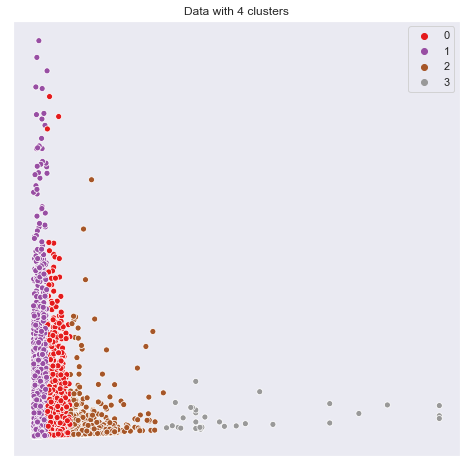

In [39]:
sns.set()
plt.figure(figsize=(8,8))
sns.scatterplot(x=set_v[:,0], y=set_v[:,1],hue=model.labels_,palette="Set1")
plt.title("Data with 4 clusters")
plt.xticks([])
plt.yticks([])
plt.show()

<li><p> <b>`There are total 4 clusters and they do not overlap a lot hence, clusters seems promising.`</b></p>
</li>
<li><p> <b>`Cluster 4 seems containing very less points and noisy points.`</b></p>
</li>
<li><p> <b>`The separation range between clusters is very less, there is a high chance that at the border points the point might be in wrong cluster` </b></p>
</li>

In [40]:
#map the labels to actual data for fetching data
project_data_temp=project_data.copy()
project_data_temp.index=np.arange(0,data_point_size)
project_data_temp['label']=model.labels_
dictionaryKmeans={}
for i in list(set(model.labels_)):
    dictionaryKmeans['cluster'+str(i)]=project_data_temp[project_data_temp.label==i]

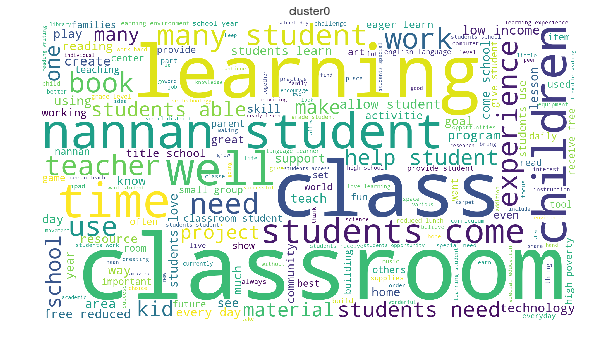

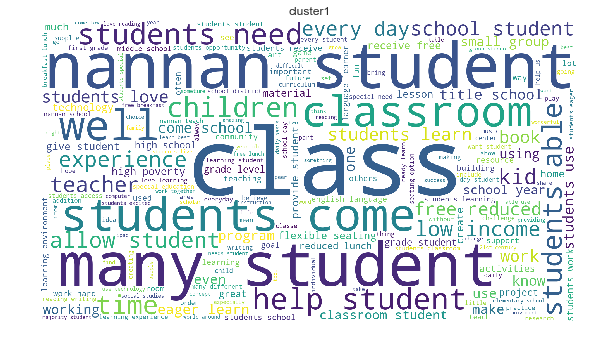

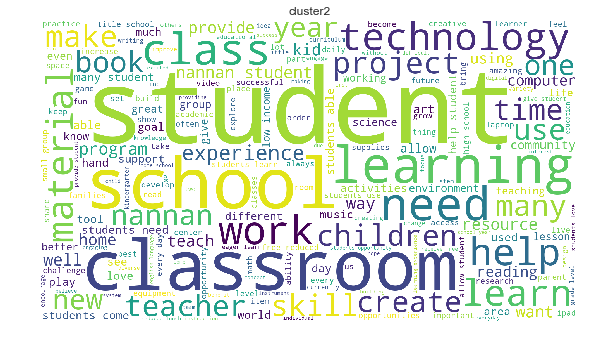

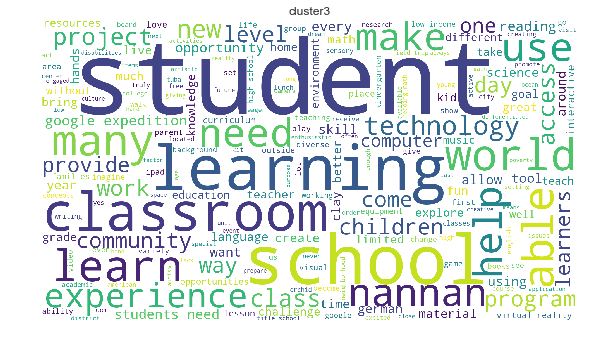

In [41]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

for key,value in dictionaryKmeans.items():
    comment_words = ' '
    stopwords = set(STOPWORDS) 

    # iterate through the csv file 
    for val in value.essay: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 1920, height = 1080, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(key)
    plt.show() 
    

<h2>2.6 Apply AgglomerativeClustering</h2>

In [35]:
from sklearn.cluster import AgglomerativeClustering
model_aggl = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
model_aggl.fit(BOW_5000)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [36]:
pca = PCA(n_components=2)
set_v = pca.fit_transform(BOW_5000)

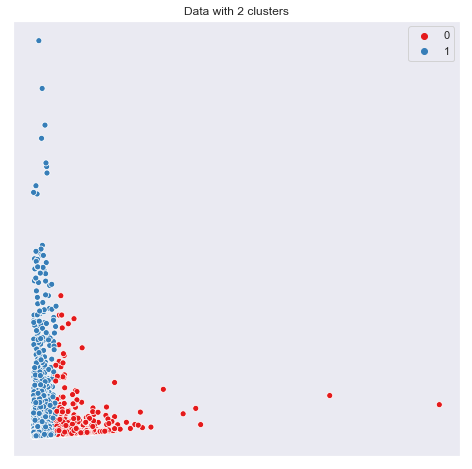

In [37]:
sns.set()
plt.figure(figsize=(8,8))
sns.scatterplot(x=set_v[:,0], y=set_v[:,1],hue=model_aggl.labels_,palette="Set1")
plt.title("Data with 2 clusters")
plt.xticks([])
plt.yticks([])
plt.show()

<li><p> <b>`There are total 2 clusters and they do overlap at border. So clusters does not seem promising.`</b></p>
</li>
<li><p> <b>`Cluster 2 seems containing noisy points.`</b></p>
</li>

In [39]:
#map the labels to actual data for fetching data
project_data_temp=project_data.copy()
project_data_temp.index=np.arange(0,5000)
project_data_temp['label']=model_aggl.labels_
dictionaryAgglomerative={}
for i in list(set(model_aggl.labels_)):
    dictionaryAgglomerative['cluster'+str(i)]=project_data_temp[project_data_temp.label==i]

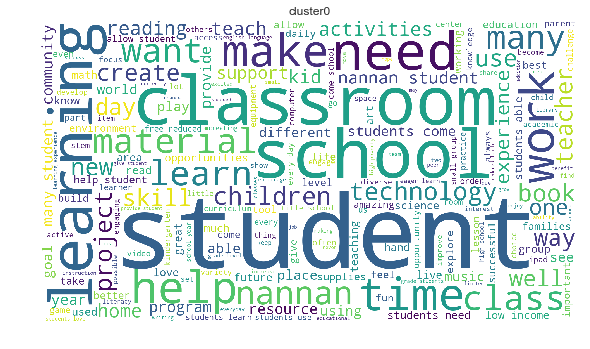

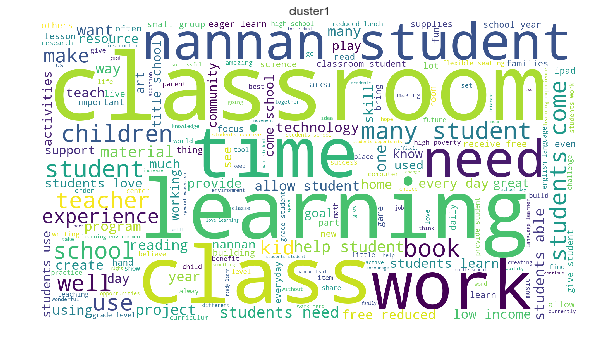

In [56]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

for key,value in dictionaryAgglomerative.items():
    comment_words = ' '
    stopwords = set(STOPWORDS) 

    # iterate through the csv file 
    for val in value.essay: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 1920, height = 1080, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(key)
    plt.show() 
    

<li><p> <b>`Cluster 1 is formed with words as student, classroom, learning and school`</b></p>
</li>
<li><p> <b>`Cluster 2 is formed with words as classroom, time, learning, class and time`</b></p>
</li>

<h2>2.7 Apply DBSCAN</h2>

In [40]:
from sklearn.neighbors import NearestNeighbors
'''have taken 1000 as a guess value as total number of points is 5000 and total features is 5000. By thumb rule if i choose 2*5000 it will be 10k and i dont have 10kth nearest neighbour'''
min_pts=1000
nbrs = NearestNeighbors(n_neighbors=min_pts, algorithm='ball_tree').fit(BOW_5000)
distances, indices = nbrs.kneighbors(BOW_5000)
print(distances.shape)

(5000, 1000)


Text(0,0.5,'distances')

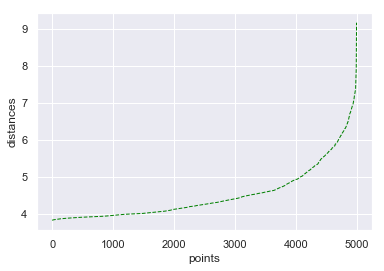

In [41]:
#print(distances.shape)
y = distances[...,min_pts-1]
y=np.sort(y)
plt.plot(np.log(y),color='green', linestyle='dashed',linewidth=1)
plt.xlabel('points')
plt.ylabel('distances')

In [42]:
np.exp(6)

403.4287934927351

In [43]:
#train model on optimal parameter
from sklearn.cluster import DBSCAN
model_dbscan=DBSCAN(min_samples=min_pts,eps=400)
model_dbscan.fit(BOW_5000)

DBSCAN(algorithm='auto', eps=400, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=1000, n_jobs=None, p=None)

In [44]:
pca = PCA(n_components=2)
set_v = pca.fit_transform(BOW_5000)

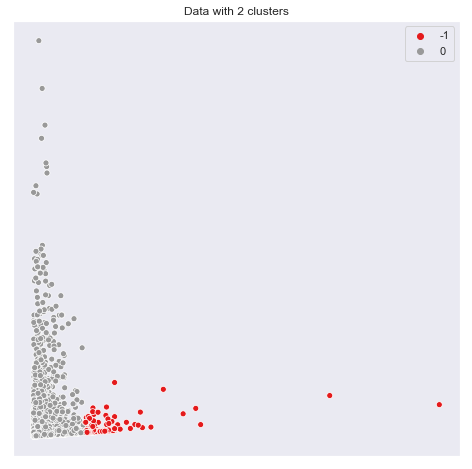

In [45]:
sns.set()
plt.figure(figsize=(8,8))
sns.scatterplot(x=set_v[:,0], y=set_v[:,1],hue=model_dbscan.labels_,palette="Set1")
plt.title("Data with 2 clusters")
plt.xticks([])
plt.yticks([])
plt.show()

<p> <b>`There are total 1 clusters formed by DBSCAN and other is set of noise point`</b></p>

In [46]:
#map the labels to actual data for fetching data
project_data_temp=project_data.copy()
project_data_temp.index=np.arange(0,5000)
project_data_temp['label']=model_dbscan.labels_
dictionaryDBSCAN={}
for i in list(set(model_dbscan.labels_)):
    dictionaryDBSCAN['cluster'+str(i)]=project_data_temp[project_data_temp.label==i]

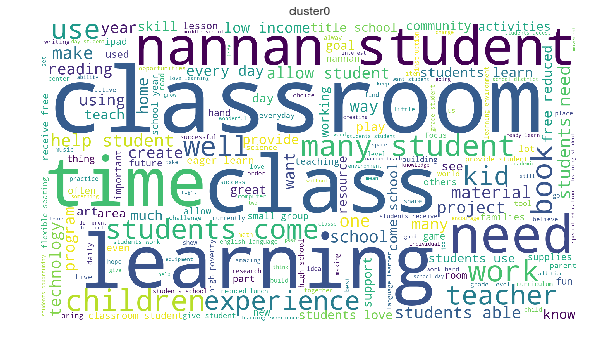

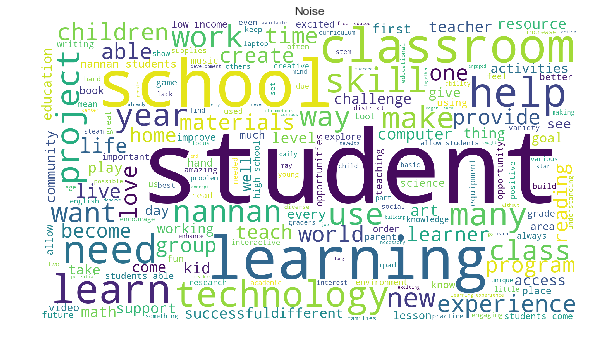

In [48]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

for key,value in dictionaryDBSCAN.items():
    comment_words = ' '
    stopwords = set(STOPWORDS) 

    # iterate through the csv file 
    for val in value.essay: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 1920, height = 1080, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    if key=='cluster-1':
        plt.title("Noise")
    else:
        plt.title(key)
    plt.show() 
    

<h1>3. Cocnlusions</h1>
<br> Please write down few lines of your observations on this assignment.

In [55]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model","Best params", "One line comment"]
x.add_row(["BAG of words", "K-Mens", "n_clusters=4", 'Promising result'])
x.add_row(["BAG of words", "Algomerative", 'n_clusters=2', 'Average result'])
x.add_row(["BAG of words", "DBSCAN",'min_samples=100 and eps=400', 'Not so good result'])
x.border=True
print(x)

+--------------+--------------+-----------------------------+--------------------+
|  Vectorizer  |    Model     |         Best params         |  One line comment  |
+--------------+--------------+-----------------------------+--------------------+
| BAG of words |    K-Mens    |         n_clusters=4        |  Promising result  |
| BAG of words | Algomerative |         n_clusters=2        |   Average result   |
| BAG of words |    DBSCAN    | min_samples=100 and eps=400 | Not so good result |
+--------------+--------------+-----------------------------+--------------------+
